In [2]:
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io 
import os
import pandas as pd
import torchvision
from keras import backend as K
import torch
from torchvision import datasets, models, transforms
import keras
import tensorflow as tf
from keras.applications import vgg16
from keras.models import Sequential,Model
from keras import layers
from tensorflow import keras
from keras.layers import Dense, Conv2D, Conv2DTranspose,MaxPool2D , Flatten, Input
from keras import optimizers
from tensorflow.keras import utils
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization.batch_normalization import BatchNormalization
from imutils import paths
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt

In [1]:
pip install --upgrade imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=31ec9d0ebb39442135c7ef00ad1e2ed514e99ad54749fe76eca4f9148e57ff06
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gc
gc.collect()

# ***Loading Dataset***

In [3]:
#Train path
DATASET_PATH = "../input/isic2017-256x256-jpeg/ISIC_2017_256x256"
# define the path to the images and masks dataset
TRAIN_IMAGE_PATH = os.path.join(DATASET_PATH, "train/images")
TRAIN_MASK_PATH = os.path.join(DATASET_PATH, "train/masks")
print(TRAIN_IMAGE_PATH)
print(TRAIN_MASK_PATH)
train_imagePaths = sorted(list(paths.list_images(TRAIN_IMAGE_PATH)))
train_maskPaths = sorted(list(paths.list_images(TRAIN_MASK_PATH)))

#Test path
TEST_IMAGE_PATH = os.path.join(DATASET_PATH, "test/images")
TEST_MASK_PATH = os.path.join(DATASET_PATH, "test/masks")
print(TEST_IMAGE_PATH)
print(TEST_MASK_PATH)
test_imagePaths = sorted(list(paths.list_images(TEST_IMAGE_PATH)))
test_maskPaths = sorted(list(paths.list_images(TEST_MASK_PATH)))
#Validation path
VALID_IMAGE_PATH = os.path.join(DATASET_PATH, "valid/images")
VALID_MASK_PATH = os.path.join(DATASET_PATH, "valid/masks")
print(VALID_IMAGE_PATH)
print(VALID_MASK_PATH)
valid_imagePaths = sorted(list(paths.list_images(VALID_IMAGE_PATH)))
valid_maskPaths = sorted(list(paths.list_images(VALID_MASK_PATH)))

../input/isic2017-256x256-jpeg/ISIC_2017_256x256/train/images
../input/isic2017-256x256-jpeg/ISIC_2017_256x256/train/masks
../input/isic2017-256x256-jpeg/ISIC_2017_256x256/test/images
../input/isic2017-256x256-jpeg/ISIC_2017_256x256/test/masks
../input/isic2017-256x256-jpeg/ISIC_2017_256x256/valid/images
../input/isic2017-256x256-jpeg/ISIC_2017_256x256/valid/masks


In [4]:
x_train = []
y_train = []

x_test = []
y_test = []

x_valid = []
y_valid = []
for i,j in zip(train_imagePaths,train_maskPaths):
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(j,0)//255
    #mask = mask.astype(np.uint8)
    x_train.append(image)
    y_train.append(mask)
    

for i,j in zip(test_imagePaths,test_maskPaths):
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(j,0)//255
    #mask = mask.astype(np.uint8)
    x_test.append(image)
    y_test.append(mask)
   

for i,j in zip(valid_imagePaths,valid_maskPaths):
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(j,0)//255
    #mask = mask.astype(np.uint8)
    x_valid.append(image)
    y_valid.append(mask)
    


In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

(2000, 256, 256, 3)
(2000, 256, 256)
(600, 256, 256, 3)
(600, 256, 256)
(150, 256, 256, 3)
(150, 256, 256)


# ***Plotting Some Samples***

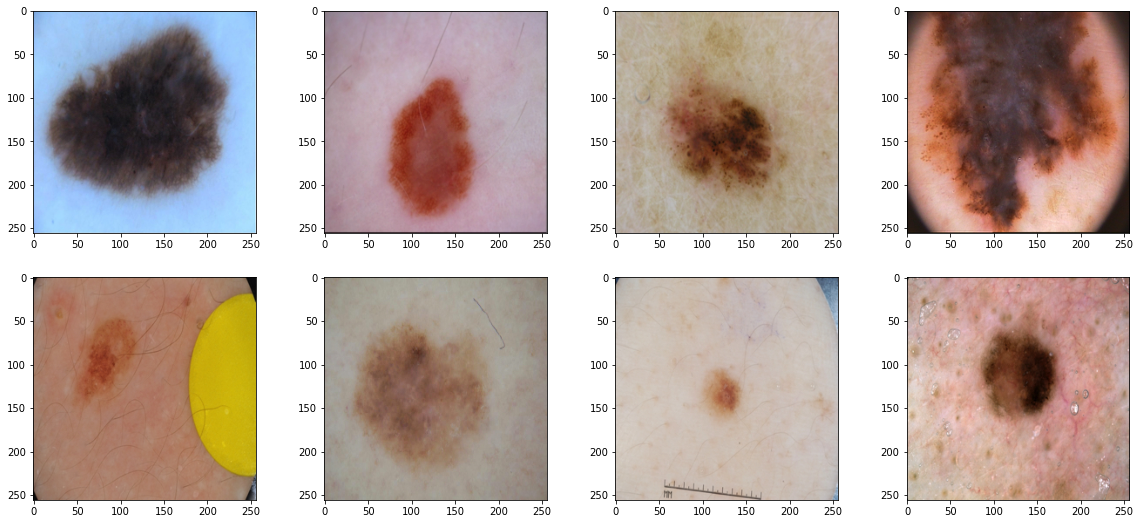

In [7]:
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(x_train[0])
plt.subplot(2,4,2)
plt.imshow(x_train[55])
plt.subplot(2,4,3)
plt.imshow(x_train[130])
plt.subplot(2,4,4)
plt.imshow(x_train[255])
plt.subplot(2,4,5)
plt.imshow(x_train[512])
plt.subplot(2,4,6)
plt.imshow(x_train[1024])
plt.subplot(2,4,7)
plt.imshow(x_train[1350])
plt.subplot(2,4,8)
plt.imshow(x_train[1890])
plt.show()

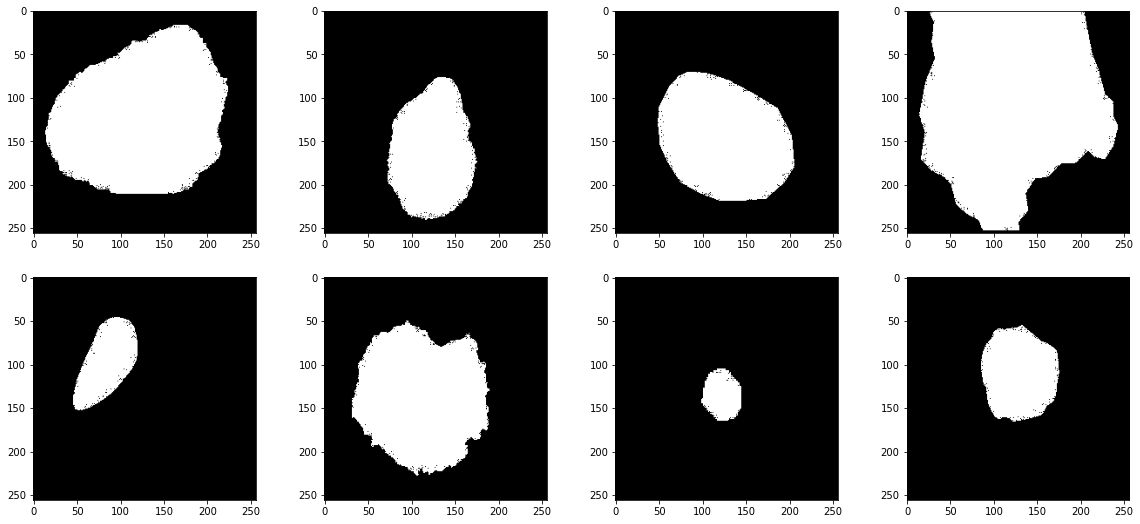

In [8]:
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(y_train[0], cmap = plt.cm.binary_r)
plt.subplot(2,4,2)
plt.imshow(y_train[55], cmap = plt.cm.binary_r)
plt.subplot(2,4,3)
plt.imshow(y_train[130], cmap = plt.cm.binary_r)
plt.subplot(2,4,4)
plt.imshow(y_train[255], cmap = plt.cm.binary_r)
plt.subplot(2,4,5)
plt.imshow(y_train[512], cmap = plt.cm.binary_r)
plt.subplot(2,4,6)
plt.imshow(y_train[1024], cmap = plt.cm.binary_r)
plt.subplot(2,4,7)
plt.imshow(y_train[1350], cmap = plt.cm.binary_r)
plt.subplot(2,4,8)
plt.imshow(y_train[1890], cmap = plt.cm.binary_r)
plt.show()

# ***Loading VGG16***

In [9]:
#Loading VGG network
#Initializing weights to imagenet 
img_input = Input(shape=(256, 256, 3))
vgg = vgg16.VGG16(include_top=False,weights = 'imagenet', input_tensor=img_input)
#for layer in vgg.layers:
#   layer.trainable = False
vgg.summary()

2022-02-04 12:13:29.497071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 12:13:29.498083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 12:13:29.498776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 12:13:29.499609: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

# ***Loss and Metric***

In [10]:
from keras import backend as K
def IoU(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    ans = (intersection + smooth) / K.abs(sum_ - intersection + smooth)
    return ans

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    ans = (intersection + smooth) / K.abs(sum_ - intersection + smooth)
    return 1 - ans

def IoU_score(y_true, y_pred,smooth = 100):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred) - intersection
    ans = (intersection + smooth) / K.abs(sum_ - intersection + smooth)
    return ans

# ***Creating The Model***

In [11]:
model = Sequential()
model.add(vgg)
model.add(Conv2D(filters=512, kernel_size=(1,1),padding = 'same',activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1),padding = 'same',activation="relu"))
model.add(Conv2D(filters=1, kernel_size=(1,1),padding = 'same',activation="relu"))
model.add(Conv2DTranspose(filters=1 ,padding='same', kernel_size=(64,64),strides=(32,32) ,activation="sigmoid"))
model.summary()
model.compile(loss=[jaccard_distance],
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=[IoU])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 512)         262656    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 512)         262656    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 1)           513       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 256, 256, 1)       4097      
Total params: 15,244,610
Trainable params: 15,244,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,restore_best_weights = True)
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,save_best_only=True,save_freq=5 * 128,mode='auto', period=1)
history = model.fit(x_train,y_train.astype(np.float32),validation_data=(x_valid, y_valid.astype(np.float32)),
                    batch_size=16,
                    epochs=50,callbacks=[es,checkpoint])

2022-02-04 12:14:14.975852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-02-04 12:14:17.017787: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


125/125 [==============================] - 28s 146ms/step - loss: 0.2773 - IoU: 0.7227 - val_loss: 0.1546 - val_IoU: 0.8454
Epoch 2/50
125/125 [==============================] - 17s 137ms/step - loss: 0.1244 - IoU: 0.8756 - val_loss: 0.1106 - val_IoU: 0.8894
Epoch 3/50
125/125 [==============================] - 17s 136ms/step - loss: 0.1036 - IoU: 0.8964 - val_loss: 0.0989 - val_IoU: 0.9011
Epoch 4/50
125/125 [==============================] - 17s 136ms/step - loss: 0.0992 - IoU: 0.9008 - val_loss: 0.0986 - val_IoU: 0.9014
Epoch 5/50
125/125 [==============================] - 17s 136ms/step - loss: 0.0960 - IoU: 0.9040 - val_loss: 0.1102 - val_IoU: 0.8898
Epoch 6/50
 15/125 [==>...........................] - ETA: 14s - loss: 0.0973 - IoU: 0.9027
Epoch 00006: loss improved from inf to 0.09726, saving model to best_model.hdf5
125/125 [==============================] - 17s 139ms/step - loss: 0.0942 - IoU: 0.9058 - val_loss: 0.0957 - val_IoU: 0.9043
Epoch 7/50
125/125 [====================

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

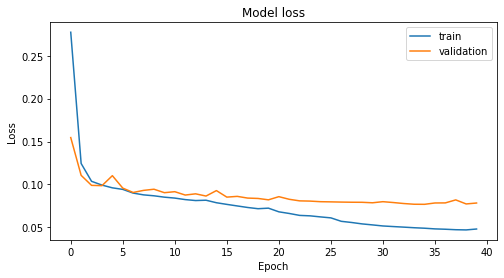

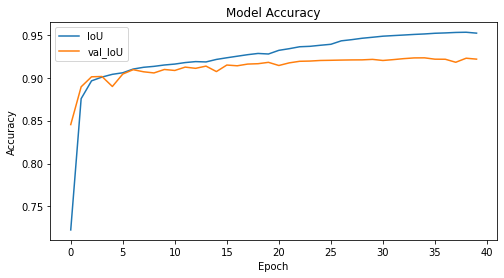

In [13]:
#PLOTS
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['IoU','val_IoU']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(8,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(8,4)).set(xlabel='Epoch',ylabel='Accuracy')

In [14]:
def threshold(img):
    sub = (model.predict(img.reshape(1,256,256,3))).flatten()
    for i in range(len(sub)):
        if sub[i] > 0.5:
            sub[i] = 1
        else:
            sub[i] = 0
    return sub

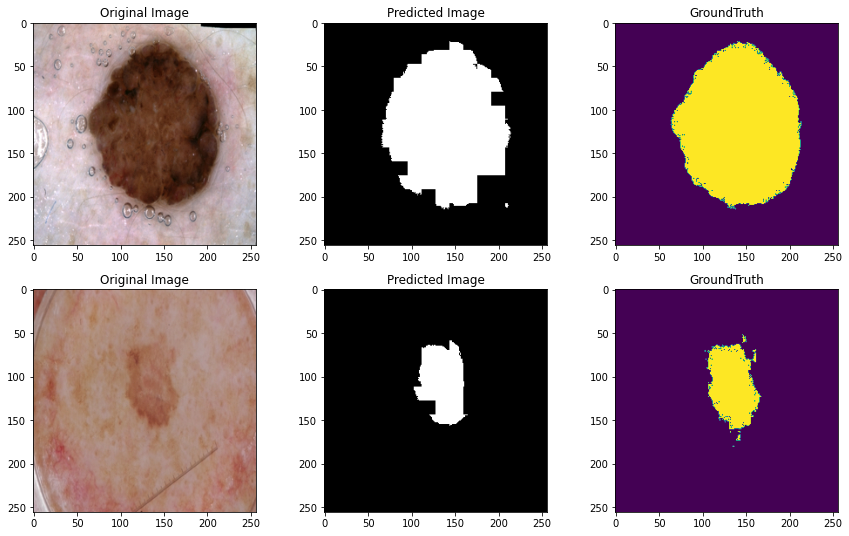

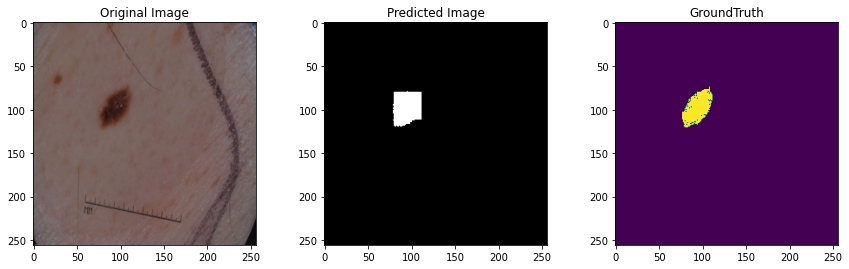

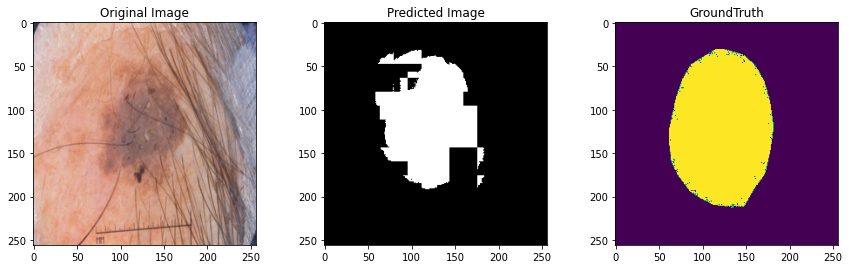

In [15]:
prediction = np.array(model.predict(x_test))
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(x_test[470])
plt.title("Original Image")
plt.subplot(2,4,2)
plt.imshow(threshold(x_test[470]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(2,4,3)
plt.imshow(y_test[470])
plt.title("GroundTruth")
plt.subplot(2,4,5)
plt.imshow(x_test[25])
plt.title("Original Image")
plt.subplot(2,4,6)
plt.imshow(threshold(x_test[25]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(2,4,7)
plt.imshow(y_test[25])
plt.title("GroundTruth")
plt.show()
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(x_test[35])
plt.title("Original Image")
plt.subplot(2,4,2)
plt.imshow(threshold(x_test[35]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(2,4,3)
plt.imshow(y_test[35])
plt.title("GroundTruth")
plt.figure(figsize=(20,9))
plt.subplot(2,4,5)
plt.imshow(x_test[45])
plt.title("Original Image")
plt.subplot(2,4,6)
plt.imshow(threshold(x_test[45]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(2,4,7)
plt.imshow(y_test[45])
plt.title("GroundTruth")
plt.show()

# ***Evaluation***

In [16]:
score = model.evaluate(x_test, y_test.astype(np.float32), verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

IoU: 89.25%


# ***Success/Fail Cases***

tf.Tensor(0.059733156, shape=(), dtype=float32)


Text(0.5, 1.0, 'GroundTruth')

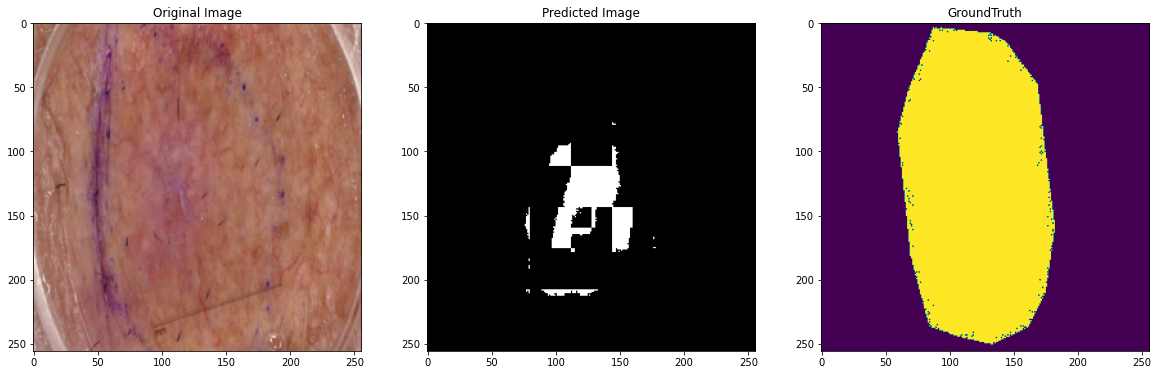

In [17]:
#Bad
iou = IoU_score(prediction[15],y_test[15])
print(iou)
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
plt.imshow(x_test[15])
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(threshold(x_test[15]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(1,3,3)
plt.imshow(y_test[15])
plt.title("GroundTruth")

tf.Tensor(0.24149005, shape=(), dtype=float32)


Text(0.5, 1.0, 'GroundTruth')

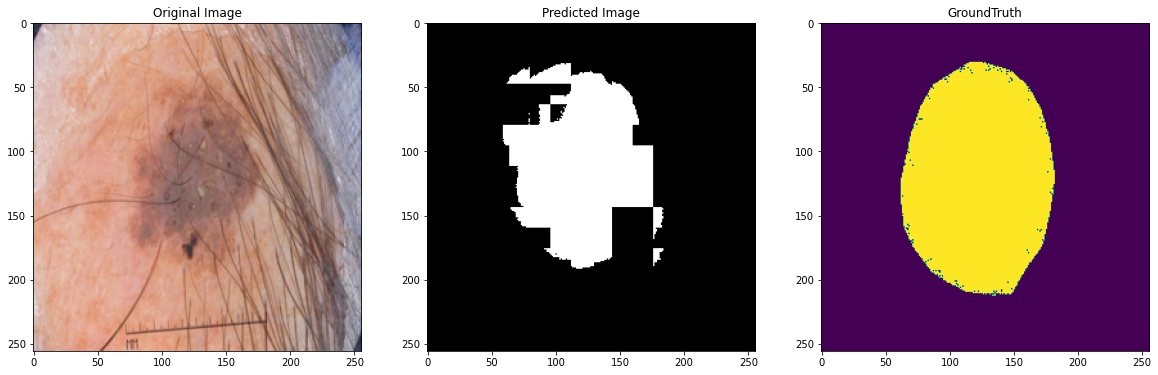

In [18]:
#Bad
iou = IoU_score(prediction[45],y_test[45])
print(iou)
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
plt.imshow(x_test[45])
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(threshold(x_test[45]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(1,3,3)
plt.imshow(y_test[45])
plt.title("GroundTruth")

tf.Tensor(0.09147855, shape=(), dtype=float32)


Text(0.5, 1.0, 'GroundTruth')

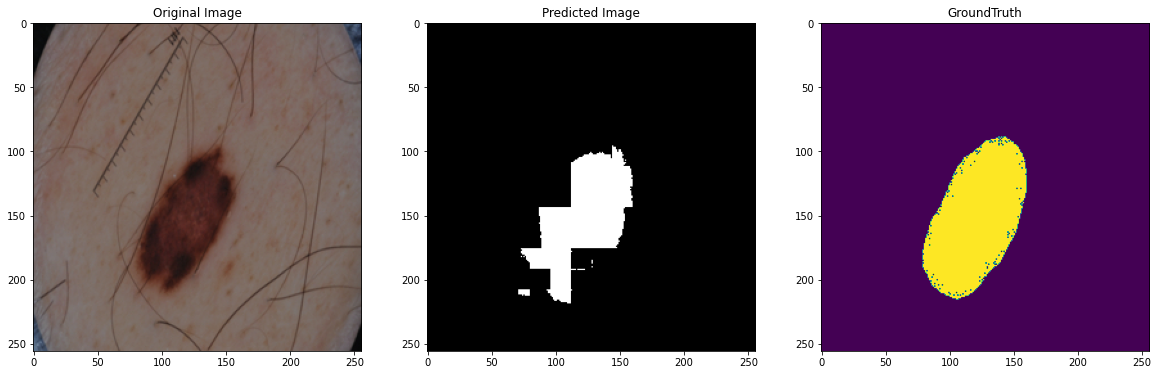

In [19]:
#Bad
iou = IoU_score(prediction[1],y_test[1])
print(iou)
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
plt.imshow(x_test[1])
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(threshold(x_test[1]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(1,3,3)
plt.imshow(y_test[1])
plt.title("GroundTruth")

tf.Tensor(0.35084918, shape=(), dtype=float32)


Text(0.5, 1.0, 'GroundTruth')

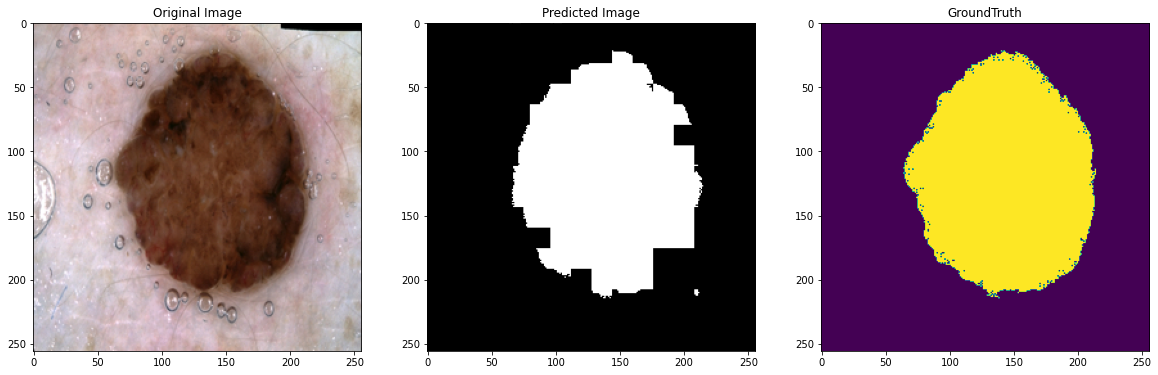

In [20]:
#Good
iou = IoU_score(prediction[470],y_test[470])
print(iou)
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
plt.imshow(x_test[470])
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(threshold(x_test[470]).reshape(256,256), plt.cm.binary_r)
plt.title("Predicted Image")
plt.subplot(1,3,3)
plt.imshow(y_test[470])
plt.title("GroundTruth")